# Applied Data Analysis Course Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns= 163
pd.options.display.max_rows=163

## D. Time-series analysis

You will investigate more closely the created_datetime and last_modified_datetime. First, you will analyze the mean time difference between these two values. And second, you will analyze the total number of items created each month over the full timeline of the data. For the second question, you will also choose an appropriate method to visualize your findings.

In [2]:
df = pd.read_csv('/data/ml_course/02_Data_Analysis/en.openfoodfacts.org.products.csv', index_col=0, parse_dates=[4, 6])
df.head()

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,allergens_en,traces_en,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,usda-ndb-import,1489069957,2017-03-09 14:32:37+00:00,1489069957,2017-03-09 14:32:37+00:00,Peanuts,Unknown,Unknown,Unknown,Torn & Glasser,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,b,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,usda-ndb-import,1489055731,2017-03-09 10:35:31+00:00,1489055731,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,Unknown,Unknown,Unknown,Grizzlies,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Organic hazelnuts, organic cashews, organic wa...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,d,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,usda-ndb-import,1489055653,2017-03-09 10:34:13+00:00,1489055653,2017-03-09 10:34:13+00:00,Organic Polenta,Unknown,Unknown,Unknown,Bob's Red Mill,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,Organic polenta,Unknown,Unknown,Unknown,35 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,"To be completed,Nutritio

## Keep only relevant columns for the task

In [3]:
df2 = df.loc[:, ['created_datetime', 'last_modified_datetime']]
df2.head()

,created_datetime,last_modified_datetime
2,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00
3,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00
4,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00
5,2017-03-09 10:34:11+00:00,2017-03-09 10:34:11+00:00
6,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00


## Mean time difference between creation and last modification

In [4]:
df2['time_difference'] = df2['last_modified_datetime'] - df2['created_datetime']
df2.head()

,created_datetime,last_modified_datetime,time_difference
2,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,0 days
3,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,0 days
4,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,0 days
5,2017-03-09 10:34:11+00:00,2017-03-09 10:34:11+00:00,0 days
6,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,0 days


In [5]:
df2.time_difference.mean()

Timedelta('106 days 15:29:51.623415')

## Total number of items created each month

In [6]:
df2.sort_values('created_datetime')
df2.head()

,created_datetime,last_modified_datetime,time_difference
2,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,0 days
3,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,0 days
4,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,0 days
5,2017-03-09 10:34:11+00:00,2017-03-09 10:34:11+00:00,0 days
6,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,0 days


In [7]:
df2['value'] = 1
df2.head()

,created_datetime,last_modified_datetime,time_difference,value
2,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,0 days,1
3,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,0 days,1
4,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,0 days,1
5,2017-03-09 10:34:11+00:00,2017-03-09 10:34:11+00:00,0 days,1
6,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,0 days,1


In [8]:
df2.set_index('created_datetime', inplace=True)
df2.head()

,last_modified_datetime,time_difference,value
created_datetime,,,
2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,0 days,1
2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,0 days,1
2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,0 days,1
2017-03-09 10:34:11+00:00,2017-03-09 10:34:11+00:00,0 days,1
2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,0 days,1


In [9]:
total_month = df2.value.resample('MS').count()
total_month.head()

created_datetime
2012-01-01 00:00:00+00:00      1
2012-02-01 00:00:00+00:00     11
2012-03-01 00:00:00+00:00    136
2012-04-01 00:00:00+00:00    164
2012-05-01 00:00:00+00:00    378
Freq: MS, Name: value, dtype: int64

/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


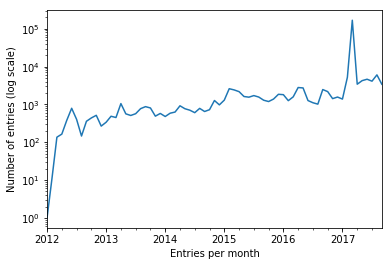

In [10]:
total_month.plot(logy=True)
plt.ylabel('Number of entries (log scale)')
plt.xlabel('Entries per month')
plt.show()